<a href="https://colab.research.google.com/github/Xenofon-Chiotopoulos/HPC-Assignments-/blob/main/HPC4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this coursework we are asked to solve the equation 
$$
u_t = Δ u
$$ 
We are asked to dicretize this system for 2 dimentions on a square plate of length 2, where the plate edges go from -1 to 1. Then we are tasked with finding the time it takes for $u_0 = 1$. Where $u_0$ is the value of the middle node of our discretized grid. There are two methods to solve this. The first is the forward Euler explict scheme, the other is the backwards Euler implicit scheme.

To allow for us to implement the explicit scheme we must first use a finite difference scheme to derive an equation we can then manipulate and solve. We start with $u_t = Δ u$, we can then express $u_t$ as 
$$
u_t = \frac{u_{t+1} - u_t}{d t}
$$
Now we can write derive the right hand side of the equation:
$$ 
Δu = α(\frac{d^2u}{dx^2}+\frac{d^2u}{dy^2})
$$
For a regular heat equation we have some sort of prefactor α which determines the thermal conductivity of the square plate we are heating, however in this case we have $α=1$ therfore we can drop this prefactor.

Now applying the forward difference scheme to each $\frac{d^2u}{dx^2}$ and $\frac{d^2u}{dy^2}$ individually we derive the following properties:
$$
\frac{d^2u}{dx^2} = \frac{u_{i+1}^{t}+u_{i-1}^{t} - 2u_{i}^{t}}{dx^2}
$$
and
$$
\frac{d^2u}{dy^2} = \frac{u_{j+1}^{t}+ u_{j-1}^{t} - 2u_{j}^{t}}{dy^2}
$$
Now we can substitute our derived equations and find a full expression for $u_t = Δu$ and we find the following expression:
$$
\frac{u_{i,j}^{t+1} - u_{i,j}^{t}}{dt} = \frac{u_{i+1,j}^{t}+u_{i-1,j}^{t} - 2u_{i,j}^{t}}{dx^2} + \frac{u_{i,j+1}^{t}+ u_{i,j-1}^{t} - 2u_{i,j}^{t}}{dy^2}
$$

We have now derived an expression for two three-point stenciles one in $dy^2$ and one in $dx^2$, however for our setup we find that since we are using a square plate we can use:
$$
dy=dx=dh
$$
This is always true for a square plate as shown in the figure below.

$$
\begin{matrix}
. & \leftarrow  & dx  & \rightarrow & . \\
\uparrow &  &   &  &  \\
dy &  & .  &  & . \\
\downarrow &  &   &  &  \\
. &  & .  &  & . \\
\end{matrix}
$$

Now using the our new $dh$ we can combine the two three-point stenciles into a 5 point stencil as follows:
$$
\frac{u_{i,j}^{t+1} - u_{i,j}^{t}}{dt} = \frac{u_{i+1,j}^{t}+u_{i-1,j}^{t} + u_{i,j+1}^{t}+ u_{i,j-1}^{t} - 4u_{i,j}^{t}}{dh^2} 
$$
The expression above is then rearranged to find an expression for $u_{i,j}^{t+1}$.
using 
$$
γ = \frac{dt}{dh^2}
$$
we have
$$
u_{i,j}^{t+1}  = (1-4γ)u_{i,j}^{t} + γ(u_{i+1,j}^{t}+u_{i-1,j}^{t} + u_{i,j+1}^{t}+ u_{i,j-1}^{t})
$$




We can turn the above equation into an affine transformation eqaution by representing $u^{t+1}$ and $u^{t}$ as vectors and we have to construct some matrix A where we have a matrix of size $(N^2,N^2)$ and vectors of length $N^2$.

the matrix equation would look like:
$$
Au^{t} = u^{t+1}
$$

An nice visulization would be to expand the elements inside the vectors and matrix to show the multiplication explicitly. The following example is for arbitrary $N$.

$$
 \begin{bmatrix} 
  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
  . & . & . & . & . & . & . & . & . \\
  γ & 0 & γ & 1-4γ & γ & 0 & γ & 0 & 0 \\
  0 &  γ & 0 &  γ &  1-4γ &  γ & 0 &  γ & 0 \\
  0 & 0 & γ & 0 & γ & 1-4γ & γ & 0 & γ \\
  . & . & . & . & . & . & . & . & . \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
  \end{bmatrix}
  \times 
  \left[\begin{array}{c} u_{0,0}^{t} \\
  u_{1,0}^{t} \\
  . \\
  u_{N-1,0}^{t} \\
  u_{N,0}^{t} \\
  u_{N,1}^{t} \\
  . \\
  u_{N,N-1}^{t} \\
  u_{N,N}^{t}\end{array} \right] = \left[ \begin{array}{c} u_{0,0}^{t+1} \\
  u_{1,0}^{t+1} \\
  . \\
  u_{N-1,0}^{t+1} \\
  u_{N,0}^{t+1} \\
  u_{N,1}^{t+1} \\
  . \\
  u_{N,N-1}^{t+1} \\
  u_{N,N}^{t+1} \end{array} \right]
$$

For different values of $N$ the diagonal of $A$ will always be $1-4γ$, the middle diagonal will have two off-diogonals adjacent to it filled with $γ$ and there will also always be two off-diagonals N and -N nodes away from the center diagonal. 

**Stability criteria**

when considering the stability of this solution we find that the prefactor of $u_{i,j}^{t+1} \geq 0$ bause for a linear PDE if the eigen value is positive the solution will be unstable, therefore:
$$1-4γ \geq 0$$
ans using the definition of $γ$
$$1-4 \frac{dt}{dh^2} \geq 0$$
therefore 
$$dt \leq \frac{dh^2}{4}$$

For the rest of this assingment I will define $dt$ as 
$$
dt = \frac{dh^2}{4}
$$
This will be kept constant as the stablility criteria for the implicit method is less strict and we can compare the results more easily.

#Explicit CPU forward Euler

###Using A

In [ ]:
from scipy.sparse.linalg import LinearOperator
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.sparse.linalg import spsolve
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
import numba
import numpy as np

The following function creates our $A$ matrix in COO format and outputs it in CSR sparse matrix format. The bounry values are encoded into the A output matrix as one's on the diagonal which will result in the preservation of defined boundry values in the initial $u_0$ vector.

In [ ]:
def discretise_heat_eqn_exp(N):
    """Generate the matrix and rhs associated with the discrete Poisson operator."""    
    dh = 2/(N-1)
    dt = (dh**2)/(4)
    gamma = ( dt )/ dh**2
    nelements = 5 * N**2 - 2 * N - 2   
    row_ind = np.zeros(nelements , dtype=np.float64)
    col_ind = np.zeros(nelements , dtype=np.float64)
    data = np.zeros(nelements, dtype=np.float64)   
    u = np.zeros(N * N, dtype=np.float64)
    u[1:N-1] = 5
    count = 0
    for j in range(N):
        for i in range(N):
            if j == 0 or j == N-1 or i == 0 or i == N-1:
                row_ind[count] = col_ind[count] = j * N + i
                data[count] =  1
                count += 1                
            else:
                row_ind[count : count + 5] = j * N + i
                col_ind[count] = j * N + i
                col_ind[count + 1] = j * N + i + 1
                col_ind[count + 2] = j * N + i - 1
                col_ind[count + 3] = (j + 1) * N + i
                col_ind[count + 4] = (j - 1) * N + i                                
                data[count] = 1 - 4 * gamma
                data[count + 1 : count + 5] =  gamma              
                count += 5
                                                                    
    return coo_matrix((data, (row_ind, col_ind)), shape=(N**2, N**2)).tocsr(), u

The following function is a numba implementation of csr sparse matrix vector multiplication (SpMV), as seen in the lecture notes, this will be used to calculate the forward difference scheme.

In [ ]:
@numba.jit(nopython=True, parallel=True)
def csr_matvec_jit(data, indices, indptr, shape, x):
    """Evaluates the matrix-vector product with a CSR matrix."""
    # Get the rows and columns   
    m, n = shape    
    y = np.zeros(m, dtype=np.float64)        
    for row_index in numba.prange(m):
        col_start = indptr[row_index]
        col_end = indptr[row_index + 1]
        for col_index in range(col_start, col_end):
            y[row_index] += data[col_index] * x[indices[col_index]]            
    return y

The csr_metvec_kernal takes the initial $A$ matrix and uses 2 different SpMV routines. The kernal works by taking the first bounry value $u_t$ matrix and we multiplying it with $A$, then we set this answer equal to $u$ at the next time step $u_{t+1}$. This is done iteratively for as many values we specify, we set the number of iterations to 20,000 to allow for large values of $N$ to converge.  

In [ ]:
def csr_matvec_kernal(csr_mat,init_vec,iter,N):
    ans = np.zeros(shape=(iter, N*N))
    res = np.zeros(shape=(iter, N*N))
    ans[0] = init_vec
    res[0] = init_vec
    for i in range(iter-1):
        ans[i+1] = csr_mat @ ans[i]
        res[i+1] = csr_matvec_jit(csr_mat.data, csr_mat.indices, csr_mat.indptr,
                                  csr_mat.shape, res[i])  
    return ans, res  

The timer function sets a dummy variable which count the number of iterations that have passed until the center value $u_{0,0}=1$. I have implemented a simple approach to finding $u_{0,0}$ where each $u$ is a vector of $N^2$ length and the middle value is the index $\frac{N^2}{2}$ of $u$ at some time $t$, $u_t$. This results in only allowing for us to evaluate matrices of odd size, however this is not a problem as we can still see the convergent behavioue despite this. An implementation for even matrices was not made as some sort of linear interpolation would have to be made and as this function is not a flat surface this would be a needless approximation. Though the function tends to be quite flat in the region near $u_{0,0}$ however this leads to needless errors.

In [ ]:
def timer(result_mat, iter, N):
    dh = 2/(N-1)
    dt = (dh**2)/(4)
    half = (N**2)//2
    timer = 0
    for i in range(iter):
        if result_mat[i,half] < 1:
            timer += 1
    time_taken = timer * dt
    return time_taken

The following function takes the last 3 functions and produces matrices that contain the matrix size $N$, a benchmark matrix and the time for each matrix size for both scipy and localy defined SpMV.

In [ ]:
def plotting_convergence(iter, max_N, step_size):
    x_axis = []
    y_axis_1 = []
    y_axis_2 = []
    benchmark = []     
    for i in range(21, max_N, step_size):
        A, u = discretise_heat_eqn_exp(i)
        ans, res = csr_matvec_kernal(A,u,iter,i)
        time_1 = timer(ans,iter,i)
        time_2 = timer(res,iter,i)
        y_axis_1.append(time_1)
        y_axis_2.append(time_2)
        x_axis.append(i)
        benchmark.append(0.424011387033)
    return x_axis, y_axis_1, y_axis_2, benchmark

Plotting a 2D heat map

In [ ]:
def heatmap2d(N,iter):
  plt.figure(dpi=120)
  ticks = np.linspace(-1,1,N)
  X, Y = np.meshgrid(ticks,ticks)
  A, u = discretise_heat_eqn_exp(N)
  dummy, _ = csr_matvec_kernal(A,u,iter,N)
  arr = dummy[-1].reshape(N,N)
  plt.imshow(arr, cmap='viridis',extent =[-1,1,-1,1] )
  plt.colorbar()
  plt.show()

Plotting a 3D heat map

In [ ]:
def heatmap3d(N,iter):
  A, u = discretise_heat_eqn_exp(N)
  ans, _ = csr_matvec_kernal(A,u,iter,N)
  dummy = ans[-1].reshape(N,N)
  sol = np.transpose(dummy)
  fig = plt.figure(figsize=(8, 8))
  ax = fig.gca(projection='3d')
  ticks= np.linspace(-1, 1, N)
  X, Y = np.meshgrid(ticks, ticks)
  surf = ax.plot_surface(X, Y, sol, antialiased=True, cmap=cm.viridis)

In [ ]:
x,y1,y2,b = plotting_convergence(15000,181,2)

The following graph plots the difference between the actual value $t^* = 0.424011387033$ and shows the relative error.

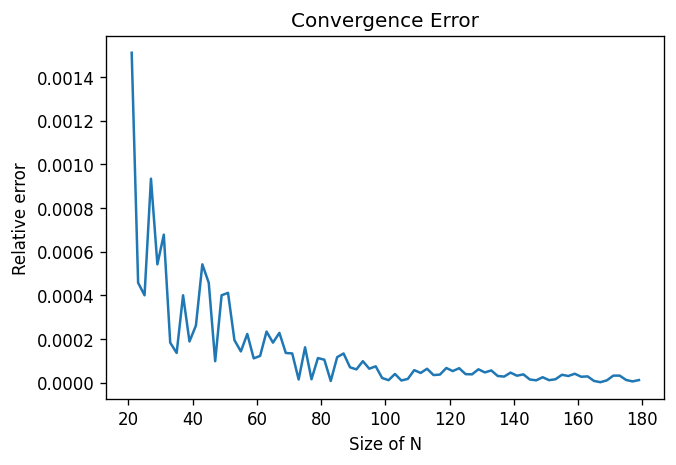

In [ ]:
c = []
plt.figure(dpi=120)
for i in range(len(b)):
  c.append(b[i]-y2[i])
plt.plot(x,c)
plt.title('Convergence Error')
plt.xlabel('Size of N')
plt.ylabel('Relative error')
plt.show()

The following plot shows the convergence to the exact time for both SpMV's

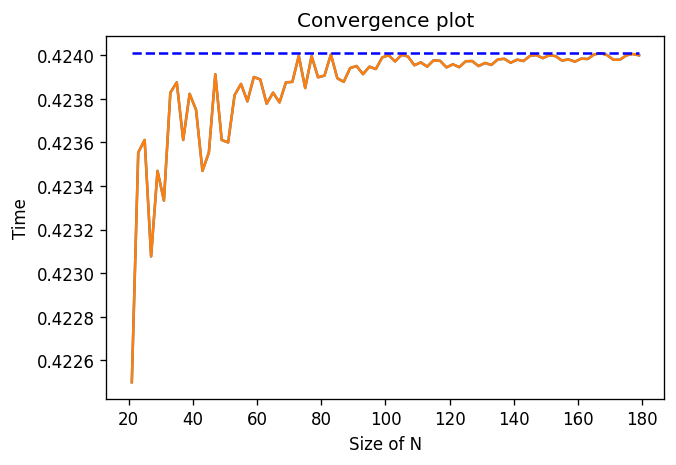

In [ ]:
plt.figure(dpi=120)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,b,'--', color='b')
plt.title('Convergence plot')
plt.xlabel('Size of N')
plt.ylabel('Time')
plt.show()

**Disscussion of plots**

The forward Euler method shows pretty good convergence and the final value of $N$ gives us a time of $t=0.4240$, which is correct to 4 digits.

In [ ]:
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\

2D heat map visualisation to see if the final $u$ produces a resonably looking result.

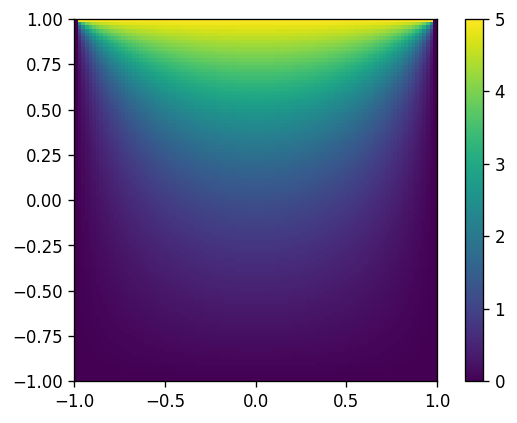

In [ ]:
heatmap2d(100,10000)

In [ ]:
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\

3D heat map visualisation to see if the final $u$ produces a resonably looking result. This will be used later to make sure the results of other methods are correct.

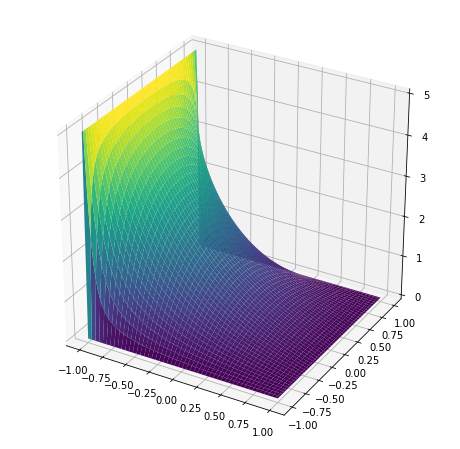

In [ ]:
heatmap3d(100,10000)

#

#Implicit backward Euler


The expression we have to derive for the backward Euler method is very similar to the forward Euler except we evaluate $u$ at $u^{t+1}$. We start much in the same way with 
$$
u_t = Δ u
$$
We split this equation up into individual derivatives and we have:
$$
u_t = \frac{u_{t+1} - u_t}{d t}
$$
And,
$$ 
Δu = \frac{d^2u}{dx^2}+\frac{d^2u}{dy^2}
$$
Now when we evaluate each $\frac{d^2u}{dx^2}$ and $\frac{d^2u}{dy^2}$ individually we find a difference as we need to implement a backwards difference scheme rather than a forwards difference one. 

$$
\frac{d^2u}{dx^2} = \frac{u_{i+1}^{t+1}+u_{i-1}^{t+1} - 2u_{i}^{t+1}}{dx^2}
$$
and
$$
\frac{d^2u}{dy^2} = \frac{u_{j+1}^{t+1}+ u_{j-1}^{t+1} - 2u_{j}^{t+1}}{dy^2}
$$
Now we can substitute our derived equations and find a full expression for $u_t = Δu$ and we find the following expression:
$$
\frac{u_{i,j}^{t+1} - u_{i,j}^{t}}{dt} = \frac{u_{i+1,j}^{t+1}+u_{i-1,j}^{t+1} + u_{i,j+1}^{t+1}+ u_{i,j-1}^{t+1} - 4u_{i,j}^{t+1}}{dh^2} 
$$
We can the rearrange the equation and imput our previously defined $γ$ to get,
$$
u_{i,j}^{t}  = (1+4γ)u_{i,j}^{t+1} - γ(u_{i+1,j}^{t+1}+u_{i-1,j}^{t+1} + u_{i,j+1}^{t+1}+ u_{i,j-1}^{t+1})
$$
Now we have an eqauation which satisfies the following form, 
$$
Au^{t+1} = u^{t}
$$
And so we find that the LHS contains an unkown vector $u^{t+1}$ and so we need to solve this system using a direct linear solver, the one chosen for this assingment is Spsolve from the Scipy.sparse.linalg libray.

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

This function is almost identical to discretise_heat_eqn_exp in its function however the values inside the matrix A are slightly different in accordance with the derivation defined above.

In [ ]:
def discretise_heat_eqn_imp(N):
    """Generate the matrix and rhs associated with the discrete Poisson operator."""
    
    dh = 2/(N-1)
    dt = (dh**2)/(4)
    gamma = ( dt )/ dh**2
    nelements = 5 * N**2 - 2 * N - 2
    
    row_ind = np.zeros(nelements , dtype=np.float64)
    col_ind = np.zeros(nelements , dtype=np.float64)
    data = np.zeros(nelements, dtype=np.float64)
    
    f = np.zeros(N * N, dtype=np.float64)
    f[1:N-1] = 5

    count = 0
    for j in range(N):
        for i in range(N):
            if j == 0 or j == N-1 or i == 0 or i == N-1:
                row_ind[count] = col_ind[count] = j * N + i
                data[count] =  1
                count += 1
                
            else:
                row_ind[count : count + 5] = j * N + i
                col_ind[count] = j * N + i
                col_ind[count + 1] = j * N + i + 1
                col_ind[count + 2] = j * N + i - 1
                col_ind[count + 3] = (j + 1) * N + i
                col_ind[count + 4] = (j - 1) * N + i
                                
                data[count] = 1 + 4 * gamma
                data[count + 1 : count + 5] = - gamma
                
                count += 5
                                                                    
    return coo_matrix((data, (row_ind, col_ind)), shape=(N**2, N**2)).tocsr(), f

This function computes every next iteration of $u^{t+1}$ and sets the calculated vaule to the next $u^{k+1}_t$. It also produces the value of temparature at the middle of the grid and the time at which the soluton converges

In [ ]:
def implicit_solver(C, D, N, max_iter):
  u_all_t = np.zeros(shape=(max_iter,N**2))
  u_mid = []
  dh = 2/(N-1)
  dt = (dh**2)/(4)
  half = N**2//2
  u_all_t[0] = D
  timing = 0
  time_list = []
  for k in range(max_iter-1):
    u_all_t[k+1] = spsolve(C, u_all_t[k])
    timing += dt
    u_mid.append(u_all_t[k,half])
    time_list.append(timing)
  return u_all_t, time_list, u_mid

Function that plots the convergence of time with respect to the temperature at the middle node $u_{0,0}$

In [ ]:
def plot_conv(iter):
  plt.figure(dpi=120)
  plt.hlines(1,0,1.25,linestyles='dashed', colors ='b')
  plt.vlines(0.424011387033,0,1.25, linestyles='dashed', colors ='b')
  N = [5,11,21,31,41,51]
  for n in range(len(N)):
    C, D = discretise_heat_eqn_imp(N[n])
    ans, plt1, plt2 = implicit_solver(C,D,N[n],iter)
    plt.plot(plt1,plt2, label=N[n])
  
  plt.xlim([0, 0.6])
  plt.ylim([0, 1.2])
  plt.title('Convergence plot')
  plt.xlabel('Time')
  plt.ylabel('Temperature')
  plt.legend()
  plt.show

These two function prepare data and plot it in the same way as done in the explicit method

In [ ]:
def conv_data_prep(iter,max_N,step_size):
  x_axis = []
  y_axis = []
  for i in range(21,max_N,step_size):
    C, D = discretise_heat_eqn_imp(i)
    ans, time_val1, mid_val_t = implicit_solver(C,D,i,iter)
    timing = timer(ans,iter,i)
    y_axis.append(timing)
    x_axis.append(i)
  return x_axis, y_axis

def conv_data_plot(x_axis,time_val,x_axis1,time_val1):
  plt.figure(dpi=120)
  plt.title('Convergence plot')
  plt.xlabel('Size of N')
  plt.ylabel('Time')
  plt.hlines(0.424011387033,20,80, linestyles='dashed', colors ='b')
  plt.plot(x_axis,time_val, label='Implicit')
  plt.plot(x_axis1,time_val1, label='Explicit')
  plt.xlim([20, 80])
  plt.ylim([0.42, 0.43])
  plt.legend()
  plt.show


Plotting a 2D heat map

In [ ]:
def heatmap2d_imp(N,iter):
  plt.figure(dpi=120)
  ticks = np.linspace(-1,1,N)
  X, Y = np.meshgrid(ticks,ticks)
  A, u = discretise_heat_eqn_imp(N)
  dummy, _,_ = implicit_solver(A,u,N,iter)
  arr = dummy[-1].reshape(N,N)
  plt.imshow(arr, cmap='viridis',extent =[-1,1,-1,1] )
  plt.colorbar()
  plt.show()

Plotting a 3D heat map

In [ ]:
def heatmap3d_imp(N,iter):
  A, u = discretise_heat_eqn_imp(N)
  ans, _, _ = implicit_solver(A,u,N,iter)
  dummy = ans[-1].reshape(N,N)
  sol = np.transpose(dummy)
  fig = plt.figure(figsize=(8, 8))
  ax = fig.gca(projection='3d')
  ticks= np.linspace(-1, 1, N)
  X, Y = np.meshgrid(ticks, ticks)
  surf = ax.plot_surface(X, Y, sol, antialiased=True, cmap=cm.viridis)

In [ ]:
x,y=conv_data_prep(3000,101,10)
x1,y1,y2,b = plotting_convergence(3000,101,10)

In [ ]:
\
\
\
\
\
\
\
\
\
\

The following plot shows convergence to the exact value $t^*$ of matrices of sizes 20-80. We can see that from this graph the convergence for the explicit method is faster and more accurate than that of the implicit version for relatively small values of $N$. Larger matrices could not be tested as when I tried they would take too long to do because of the cumbersome Spsolve step. To evaluate this at larger $N$ I would suggest a local implementation of the Spsolve algorithm.

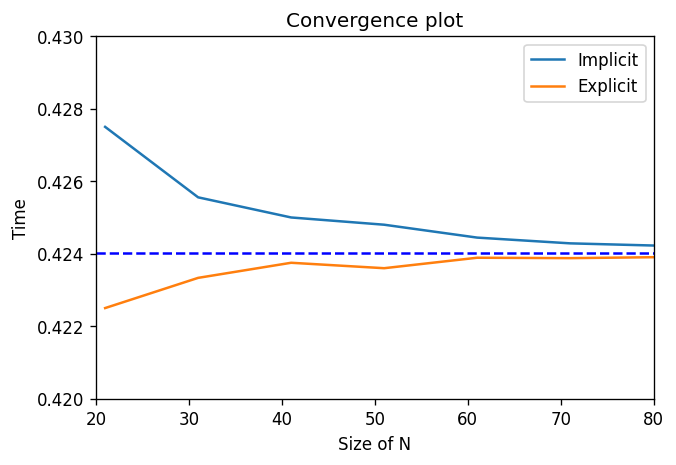

In [ ]:
conv_data_plot(x,y,x1,y1)

In [ ]:
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\

The following graph shows a plot of time against the temperature of the middle node $u_{0,0}$. This graph very clearly shows the effect of increacing $N$, which essentially decreaces the value of $dt$ which in turn increaces the fidelity of the grid allowing for more accurate convergence.

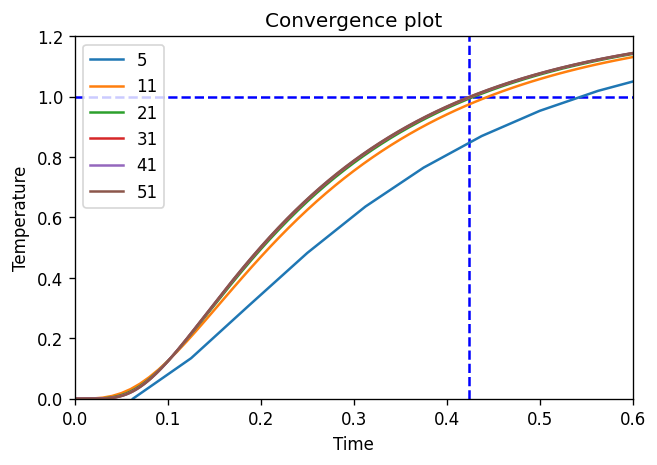

In [ ]:
plot_conv(2000)

In [ ]:
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\


The 2D heatmat plotted is just a visual test and clearly this passes the test as the result produced is very similar to that of the explicit method.


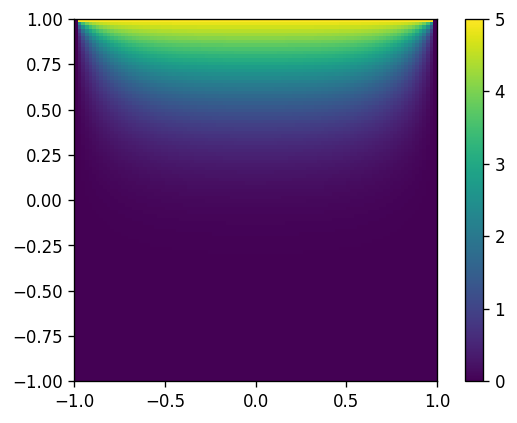

In [ ]:
heatmap2d_imp(100,1000)

In [ ]:
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\

3D method plotted for the same reasons as the 2D plot

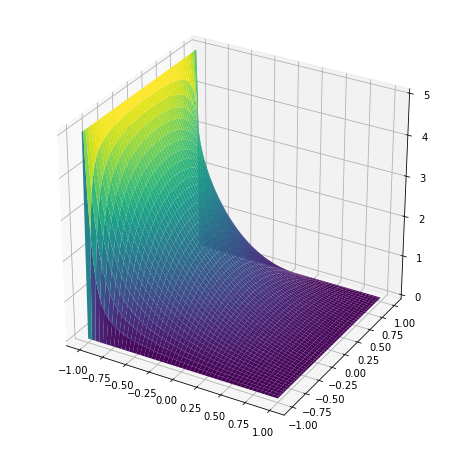

In [ ]:
heatmap3d_imp(100,5000)

#GPU

The main reason to use a GPU for a problem like this is because we will be able to compute matrices for much larger dimensions within our timeframe and there is less of a risk of running out of RAM.

In [ ]:
from numba import cuda

GPU kernal that computes CSR SpMV

In [ ]:
@cuda.jit()
def csr_matvec_gpu_vector(data, indices, indptr, shape, l_u, l_y, iter):
  """Evaluates the matrix-vector product with a CSR matrix."""
  #initilization A

  local_data = data
  local_indices = indices
  local_indptr = indptr
  #initilization vectors
  local_u = l_u
  local_y = l_y
  #Thread
  tx = cuda.threadIdx.x 
  bx = cuda.blockIdx.x
  row = block_size*bx + tx
  # Get the rows and columns    
  cuda.syncthreads()
  for i in range(iter):
    if row < N*N:
      dummy = 0.
      col_start = local_indptr[row]
      col_end = local_indptr[row + 1]
      for col_index in range(col_start, col_end):
        dummy += local_data[col_index] * local_u[indices[col_index]]
      local_y[row] = dummy 
      cuda.syncthreads()

Function that plots the GPU result for verification

In [ ]:
def heatmap3d_gpu(N,iter):
  elements = 4*(N-1)+4*(N-2)**2
  y = np.zeros(N**2, dtype=np.float32)

  block_size = 512
  threadsperblock = (N**2 + block_size - 1) // block_size

  A, u = discretise_heat_eqn_exp(N)

  l_data = cuda.to_device(A.data.astype('float32'))
  l_ind = cuda.to_device(A.indices.astype('int32'))
  l_ptr = cuda.to_device(A.indptr.astype('int32'))

  gpu_list = []
  local_y = cuda.to_device(y)
  for i in range(iter):
    local_u = cuda.to_device(u)
    csr_matvec_gpu_vector[(threadsperblock,1),(block_size,1)](l_data, l_ind, l_ptr, A.shape[0], local_u, local_y, iter)
    u = local_y.copy_to_host()
    gpu_list.append(u)
    

  dummy = gpu_list[-1].reshape(N,N)
  sol = np.transpose(dummy)
  fig = plt.figure(figsize=(8, 8))
  ax = fig.gca(projection='3d')
  ticks= np.linspace(-1, 1, N)
  X, Y = np.meshgrid(ticks, ticks)
  surf = ax.plot_surface(X, Y, sol, antialiased=True, cmap=cm.viridis)

Function that calls and runs the kernal and output a results matrix

In [ ]:
def run_kernal(N,iter):
  elements = 4*(N-1)+4*(N-2)**2
  y = np.zeros(N**2, dtype=np.float32)

  block_size = 512
  threadsperblock = (N**2 + block_size - 1) // block_size

  A, u = discretise_heat_eqn_exp(N)

  l_data = cuda.to_device(A.data.astype('float32'))
  l_ind = cuda.to_device(A.indices.astype('int32'))
  l_ptr = cuda.to_device(A.indptr.astype('int32'))

  gpu_list = []
  local_y = cuda.to_device(y)
  for i in range(iter):
    local_u = cuda.to_device(u)
    csr_matvec_gpu_vector[(threadsperblock,1),(block_size,1)](l_data, l_ind, l_ptr, A.shape[0], local_u, local_y, iter)
    u = local_y.copy_to_host()
    gpu_list.append(u)
  return gpu_list

In [ ]:
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\

A visual verification that the GPU code output the correct thing 

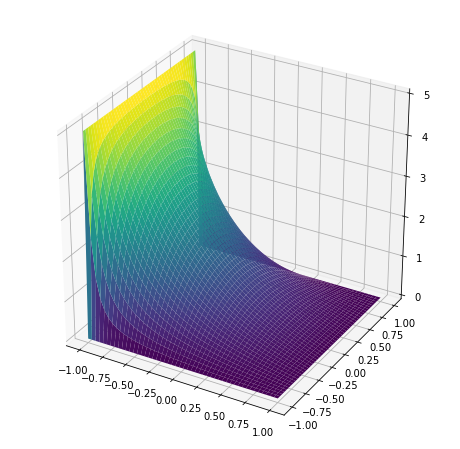

In [ ]:
N=50
block_size = 512
threadsperblock = (N**2 + block_size - 1) // block_size
heatmap3d_gpu(N,5000)

#dep code

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

def discretise_heat(N, alpha = 1):
    """Generate the matrix and rhs associated with the discrete Poisson operator."""
    
    h = np.linspace(-1,1,N)
    dh = 1/(N-1)   
    dt = (dh**2)/(4)
    gamma = ( dt )/ dh**2
    A = np.zeros(shape= (N**2,N**2) , dtype=np.float64)
    b = np.zeros(N**2)
    b[0:N] = 5.0
    b[N**2-N:N**2] = 0.0
    b[0:N**2:N] = 0.0 
    b[N-1:N**2:N] = 0.0
    print(dt)
    for i in range(N**2):          
      A[i,i] = 1 + 4 * gamma
      if i < N**2-1:
        A[i,i+1] = - gamma
      if i >= 1 :
        A[i,i-1] = - gamma
      if i < N**2-N:
        A[i,i+N] = - gamma
      if i >= N :
        A[i,i-N] = - gamma
                                            
    return A, b, dt

In [ ]:
A, b, dt = discretise_heat(3)
A = csr_matrix(A)
print(A.todense())

0.0625
[[ 2.   -0.25  0.   -0.25  0.    0.    0.    0.    0.  ]
 [-0.25  2.   -0.25  0.   -0.25  0.    0.    0.    0.  ]
 [ 0.   -0.25  2.   -0.25  0.   -0.25  0.    0.    0.  ]
 [-0.25  0.   -0.25  2.   -0.25  0.   -0.25  0.    0.  ]
 [ 0.   -0.25  0.   -0.25  2.   -0.25  0.   -0.25  0.  ]
 [ 0.    0.   -0.25  0.   -0.25  2.   -0.25  0.   -0.25]
 [ 0.    0.    0.   -0.25  0.   -0.25  2.   -0.25  0.  ]
 [ 0.    0.    0.    0.   -0.25  0.   -0.25  2.   -0.25]
 [ 0.    0.    0.    0.    0.   -0.25  0.   -0.25  2.  ]]


In [ ]:
def implicit_solver_dense(A, b, N, max_iter):
  u_all_t = np.zeros(shape=(max_iter,N**2))
  u_all_t[0] = b
  for k in range(max_iter-1):
    u_all_t[k+1] = spsolve(A, u_all_t[k])
    u_all_t[k+1,0:N] = 5.0
    u_all_t[k+1,N**2-N:N**2] = 0.0
    u_all_t[k+1][0:N**2:N] = 0.0
    u_all_t[k+1][N-1:N**2:N] = 0.0
    
    
  return u_all_t

In [ ]:
ans = implicit_solver_dense(A, b, 31, 2000)
'''for i in range(100):
  print(ans[i].reshape(5,5))

'''

ValueError: ignored

In [ ]:
half = int(31**2/2)
ans[-1,half]

NameError: ignored

In [ ]:
list_1 = []
list_2 = []
timer = 0
for i in range(2000):
  if ans[i,half] < 1:
    list_1.append(ans[i,half])
    list_2.append(i*dt)
    timer += 1
plt.plot(list_1,list_2)
plt.show()
print(timer*dt)

NameError: ignored

In [ ]:
 17500*2.5e-05

0.4375

In [ ]:
def discretise_poisson(N):
    """Generate the matrix and rhs associated with the discrete Poisson operator."""
    
    dh = 2/(N-1)
    dt = (dh**2)/(4)
    gamma = ( dt )/ dh**2
    nelements = 5 * N**2 - 2 * N - 2
    
    row_ind = np.zeros(nelements , dtype=np.float64)
    col_ind = np.zeros(nelements , dtype=np.float64)
    data = np.zeros(nelements, dtype=np.float64)
    
    f = np.zeros(N * N, dtype=np.float64)
    f[1:N-1] = 5

    count = 0
    for j in range(N):
        for i in range(N):
            if j == 0 or j == N-1 or i == 0 or i == N-1:
                row_ind[count] = col_ind[count] = j * N + i
                data[count] =  1
                count += 1
                
            else:
                row_ind[count : count + 5] = j * N + i
                col_ind[count] = j * N + i
                col_ind[count + 1] = j * N + i + 1
                col_ind[count + 2] = j * N + i - 1
                col_ind[count + 3] = (j + 1) * N + i
                col_ind[count + 4] = (j - 1) * N + i
                                
                data[count] = 1 + 4 * gamma
                data[count + 1 : count + 5] = - gamma
                
                count += 5
                                                                    
    return coo_matrix((data, (row_ind, col_ind)), shape=(N**2, N**2)).tocsr(), f, dt

In [ ]:
C, D = discretise_poisson(21)

0.0025000000000000005


In [ ]:
def implicit_solver(C, D, N, max_iter):
  u_all_t = np.zeros(shape=(max_iter,N**2))
  u_mid = []
  dh = 2/(N-1)
  dt = (dh**2)/(4)
  half = N**2//2
  u_all_t[0] = D
  timing = 0
  time_list = []
  for k in range(max_iter-1):
    u_all_t[k+1] = spsolve(C, u_all_t[k])
    timing += dt
    u_mid.append(u_all_t[k,half])
    time_list.append(timing)
  return u_all_t, time_list, u_mid

In [ ]:
def plot_conv(iter):
  plt.hlines(1,0,1.25,linestyles='dashed', colors ='b')
  plt.vlines(0.424011387033,0,1.25, linestyles='dashed', colors ='b')
  N = [11,41,71,101]
  for n in range(len(N)):
    C, D = discretise_poisson(N[n])
    ans, plt1, plt2 = implicit_solver(C,D,N[n],iter)
    plt.plot(plt1,plt2)
  plt.show

0.010000000000000002
0.0006250000000000001
0.0002040816326530612
0.0001


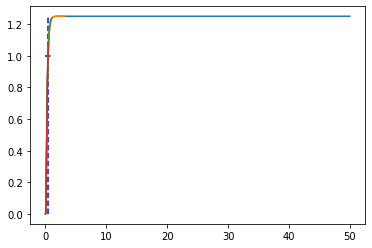

In [ ]:
plot_conv(5000)

In [ ]:
ans[1062][(51**2)//2]

1.000450745442881

In [ ]:
0.0004 * 1062

0.4248

###Direct update

In [ ]:
from numba import cuda

#setting up params
plate_length = 2
max_iter_time = 100

a = 1

N = 6
h = np.linspace(-1,1,N)

delta_h = h[1] - h[0]
delta_t = (delta_h**2)/(4*a)

gamma = (delta_t*a) / (delta_h ** 2)
len = int(plate_length/delta_h)
u = np.empty((max_iter_time, len*len)).astype('float64')
mid_val = np.zeros(max_iter_time)
u_top = 5.0
u.fill(u_initial)
u[:, 0:len] = u_top


@cuda.jit()
def calculate_gpu(u, mid_val, len, gamma, max_iter_time):
  i, j = cuda.grid(2)
  
  if i > 0 and i < len - 1 and j > 0 and j < len - 1:
    for k in range(0, max_iter_time-1, 1):
      cuda.syncthreads()
      u[k + 1, i*len + j] = gamma * (u[k][(i+1)*len + j] + u[k][(i-1)*len + j] + u[k][i*len + j+1] + u[k][i*len + j-1] - 4*u[k][i*len + j]) + u[k][i*len + j]
      mid_val[k] = u[k , int((len**2)/2)] 
      cuda.syncthreads()


In [ ]:
delta_t

0.04000000000000001

In [ ]:
threadsperblock = 16
blockspergrid = (N + (threadsperblock - 1)) // threadsperblock

local_u = cuda.to_device(u)
local_mid_val = cuda.to_device(mid_val)

calculate_gpu[(threadsperblock,threadsperblock),(blockspergrid,blockspergrid)](local_u, local_mid_val, len, gamma, max_iter_time)

arr1 = np.empty(shape=u.shape, dtype = u.dtype)
arr2 = np.empty(shape=mid_val.shape, dtype = mid_val.dtype)
local_u.copy_to_host(arr1)
local_mid_val.copy_to_host(arr2)
local_u = arr1
local_mid_val = arr2

CudaSupportError: ignored

In [ ]:
#print(local_u)
print(local_mid_val)

NameError: ignored